In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_grouped_evaluation_returns

In [3]:
lss = ['-', '--', ':']
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rc('font', size=12)

In [4]:
#############################################################
# Dynamics - 0.1M Records - No additional epoochs of training
#############################################################

# 0.1M Records
MP449 = get_results("MP449")
MP450 = get_results("MP450")
MP451 = get_results("MP451")

# 0.2M Records
MP452 = get_results("MP452")
MP453 = get_results("MP453")
MP454 = get_results("MP454")

# 0.5M Records
MP455 = get_results("MP455")
MP456 = get_results("MP456")
MP457 = get_results("MP457")

# 1M Records
MP458 = get_results("MP458")
MP459 = get_results("MP459")
MP460 = get_results("MP460")

# 2M Records
MP533 = get_results("MP533")
MP534 = get_results("MP534")
MP535 = get_results("MP535")

In [5]:
############################################################
# Dynamics - 0.1M Records - 3 additional epoochs of training
############################################################

# 0.1M Records
MP473 = get_results("MP473")
MP474 = get_results("MP474")
MP475 = get_results("MP475")

# 0.2M Records
MP476 = get_results("MP476")
MP477 = get_results("MP477")
MP478 = get_results("MP478")

# 0.5M Records
MP479 = get_results("MP479")
MP480 = get_results("MP480")
MP481 = get_results("MP481")

# 1M Records
MP482 = get_results("MP482")
MP483 = get_results("MP483")
MP484 = get_results("MP484")

# 2M Records
MP536 = get_results("MP536")
MP537 = get_results("MP537")
MP538 = get_results("MP538")

In [6]:
###########################################################
# Dynamics - 1M Records - No additional epoochs of training
###########################################################

# 0.1M Records
MP497 = get_results("MP497")
MP498 = get_results("MP498")
MP499 = get_results("MP499")

# 0.2M Records
MP500 = get_results("MP500")
MP501 = get_results("MP501")
MP502 = get_results("MP502")

# 0.5M Records
MP503 = get_results("MP503")
MP504 = get_results("MP504")
MP505 = get_results("MP505")

# 1M Records
MP506 = get_results("MP506")
MP507 = get_results("MP507")
MP508 = get_results("MP508")

# 2M Records
MP539 = get_results("MP539")
MP540 = get_results("MP540")
MP541 = get_results("MP541")

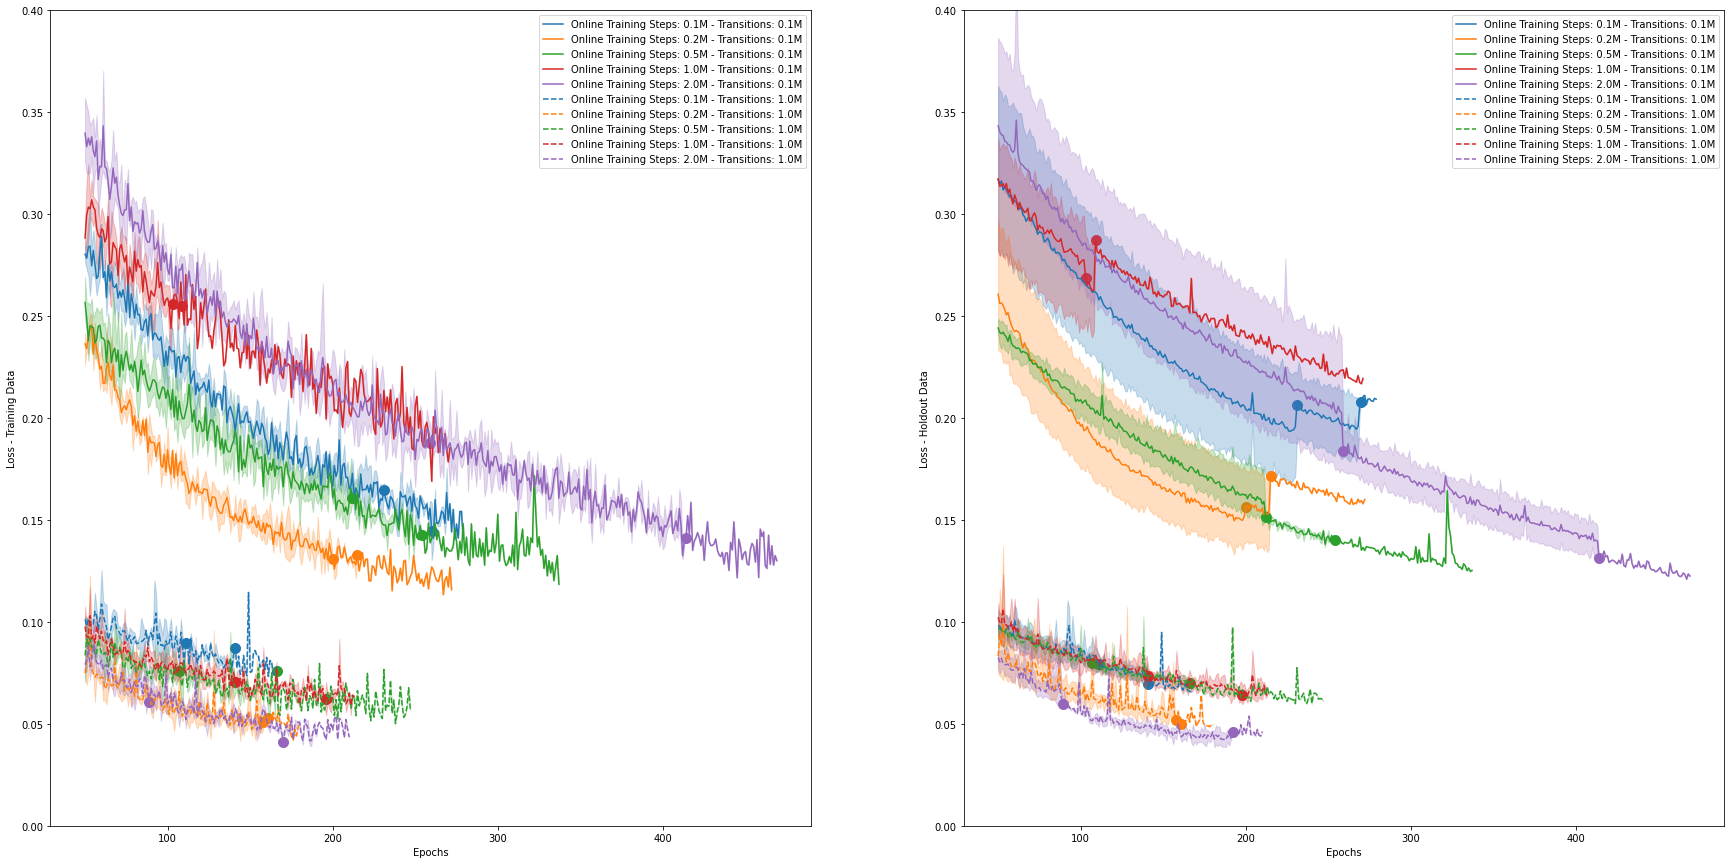

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(30,15))

starting_epoch = 100
for i, metric in enumerate(['model_loss_history', 'model_holdout_loss_history']):
    for j, exp_set_lables in enumerate([
        [
            ((MP449, MP450, MP451), 'Online Training Steps: 0.1M - Transitions: 0.1M'),
            ((MP452, MP453, MP454), 'Online Training Steps: 0.2M - Transitions: 0.1M'),
            ((MP455, MP456, MP457), 'Online Training Steps: 0.5M - Transitions: 0.1M'),
            ((MP458, MP459, MP460), 'Online Training Steps: 1.0M - Transitions: 0.1M'),
            ((MP533, MP534, MP535), 'Online Training Steps: 2.0M - Transitions: 0.1M'),
        ],
        [
            ((MP497, MP498, MP499), 'Online Training Steps: 0.1M - Transitions: 1.0M'),
            ((MP500, MP501, MP502), 'Online Training Steps: 0.2M - Transitions: 1.0M'),
            ((MP503, MP504, MP505), 'Online Training Steps: 0.5M - Transitions: 1.0M'),
            ((MP506, MP507, MP508), 'Online Training Steps: 1.0M - Transitions: 1.0M'),
            ((MP539, MP540, MP541), 'Online Training Steps: 2.0M - Transitions: 1.0M'),
        ]
    ]):
        for k, (exp_set, legend_label) in enumerate(exp_set_lables):
            comb_arr= np.vstack(list(zip_longest(*[
                getattr(exp.dynamics, metric).mean(axis=1).values for exp in exp_set
                ],
                fillvalue=np.NaN
            )))[starting_epoch:]
            mean_arr = np.nanmean(comb_arr, axis=-1)
            min_arr = np.nanmin(comb_arr, axis=-1)
            max_arr = np.nanmax(comb_arr, axis=-1)
            x_vals = np.arange(len(mean_arr)) + 50

            ax[i].plot(x_vals, mean_arr, c=cols[k], ls=lss[j], label=legend_label)
            ax[i].fill_between(x_vals, min_arr, max_arr, color=cols[k], alpha=0.25)

            terminal_points = np.sort(comb_arr.argmin(axis=0))[:-1]
            ax[i].scatter(x_vals[terminal_points], mean_arr[terminal_points], color=cols[k], s=100)

    ax[i].set_xlabel('Epochs')
    ax[i].set_ylim(0,0.4)
    ax[i].legend()

ax[0].set_ylabel('Loss - Training Data')
ax[1].set_ylabel('Loss - Holdout Data')

pass

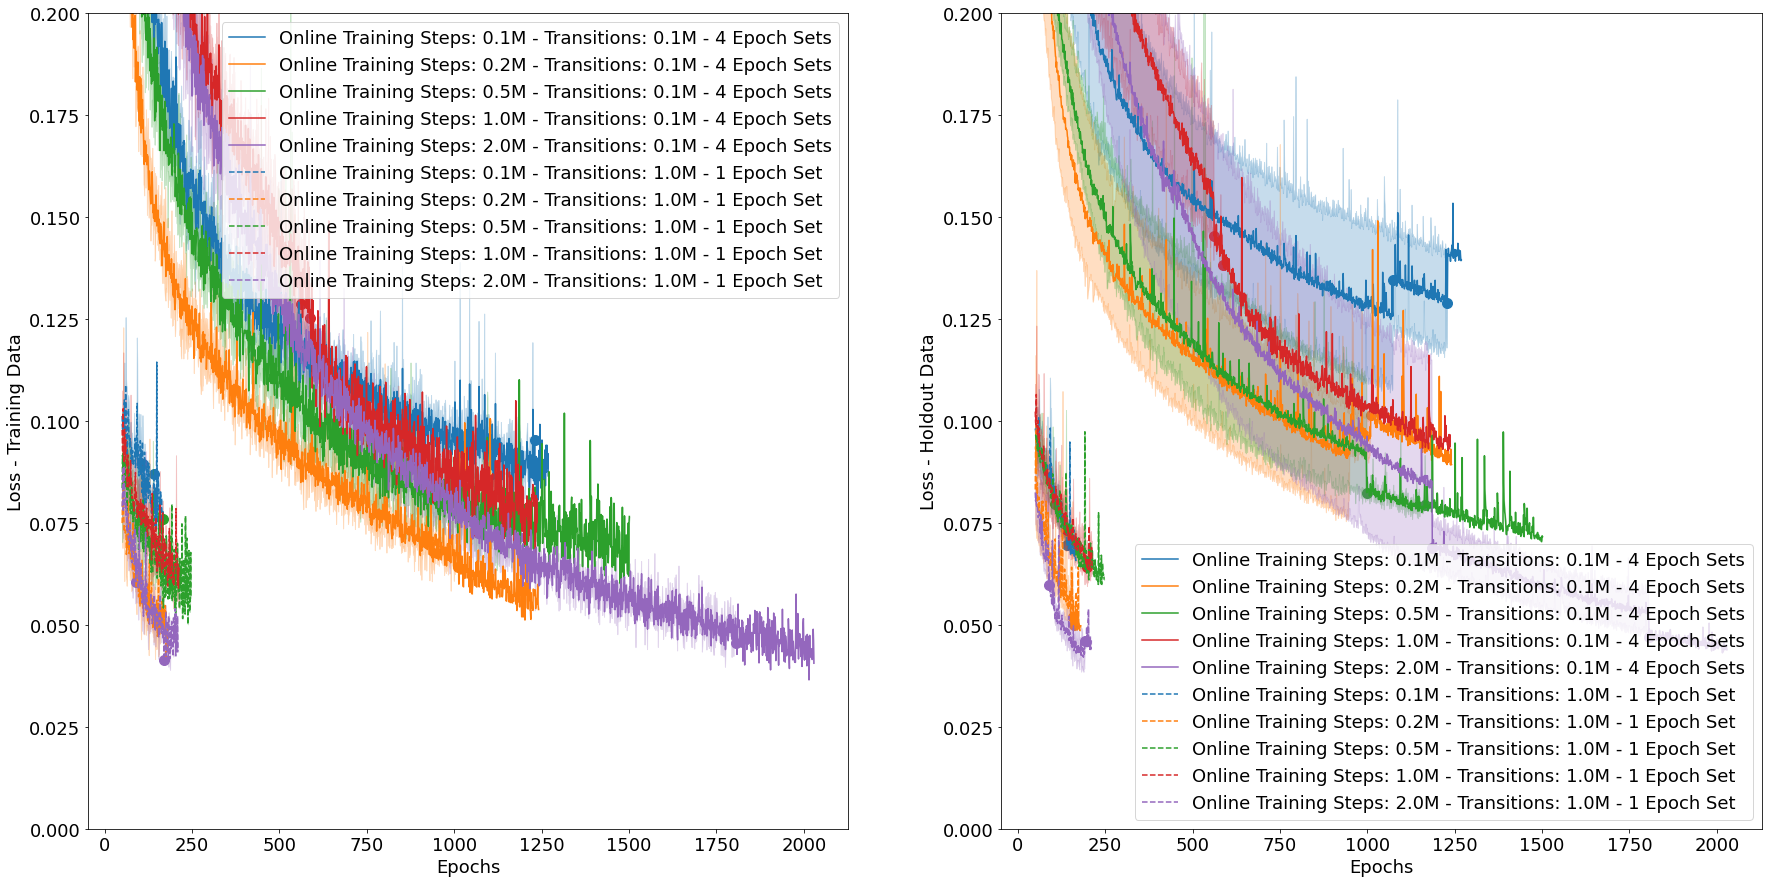

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(30,15))

starting_epoch = 100
for i, metric in enumerate(['model_loss_history', 'model_holdout_loss_history']):
    for j, exp_set_lables in enumerate([
        [
            ((MP473, MP474, MP475), 'Online Training Steps: 0.1M - Transitions: 0.1M - 4 Epoch Sets'),
            ((MP476, MP477, MP478), 'Online Training Steps: 0.2M - Transitions: 0.1M - 4 Epoch Sets'),
            ((MP479, MP480, MP481), 'Online Training Steps: 0.5M - Transitions: 0.1M - 4 Epoch Sets'),
            ((MP482, MP483, MP484), 'Online Training Steps: 1.0M - Transitions: 0.1M - 4 Epoch Sets'),
            ((MP536, MP537, MP538), 'Online Training Steps: 2.0M - Transitions: 0.1M - 4 Epoch Sets'),
        ],
        [
            ((MP497, MP498, MP499), 'Online Training Steps: 0.1M - Transitions: 1.0M - 1 Epoch Set'),
            ((MP500, MP501, MP502), 'Online Training Steps: 0.2M - Transitions: 1.0M - 1 Epoch Set'),
            ((MP503, MP504, MP505), 'Online Training Steps: 0.5M - Transitions: 1.0M - 1 Epoch Set'),
            ((MP506, MP507, MP508), 'Online Training Steps: 1.0M - Transitions: 1.0M - 1 Epoch Set'),
            ((MP539, MP540, MP541), 'Online Training Steps: 2.0M - Transitions: 1.0M - 1 Epoch Set'),
        ]
    ]):
        for k, (exp_set, legend_label) in enumerate(exp_set_lables):
            comb_arr= np.vstack(list(zip_longest(*[
                getattr(exp.dynamics, metric).mean(axis=1).values for exp in exp_set
                ],
                fillvalue=np.NaN
            )))[starting_epoch:]
            mean_arr = np.nanmean(comb_arr, axis=-1)
            min_arr = np.nanmin(comb_arr, axis=-1)
            max_arr = np.nanmax(comb_arr, axis=-1)
            x_vals = np.arange(len(mean_arr)) + 50

            ax[i].plot(x_vals, mean_arr, c=cols[k], ls=lss[j], label=legend_label)
            ax[i].fill_between(x_vals, min_arr, max_arr, color=cols[k], alpha=0.25)

            terminal_points = np.sort(comb_arr.argmin(axis=0))[:-1]
            ax[i].scatter(x_vals[terminal_points], mean_arr[terminal_points], color=cols[k], s=100)

    ax[i].set_xlabel('Epochs')
    ax[i].set_ylim(0,0.2)
    ax[i].legend()

ax[0].set_ylabel('Loss - Training Data')
ax[1].set_ylabel('Loss - Holdout Data')

pass

In [9]:
######
# MOPO
######

# 0.1M Records
MP461 = get_results("MP461")
MP462 = get_results("MP462")
MP463 = get_results("MP463")

# 0.2M Records
MP464 = get_results("MP464")
MP465 = get_results("MP465")
MP466 = get_results("MP466")

# 0.5M Records
MP467 = get_results("MP467")
MP468 = get_results("MP468")
MP469 = get_results("MP469")

# 1M Records
MP470 = get_results("MP470")
MP471 = get_results("MP471")
MP472 = get_results("MP472")

# 2M Records
MP542 = get_results("MP542")
MP543 = get_results("MP543")
MP544 = get_results("MP544")

In [10]:
######
# MBPO
######

# 0.1M Records
MP611 = get_results("MP611")
MP612 = get_results("MP612")
MP613 = get_results("MP613")

# 0.2M Records
MP614 = get_results("MP614")
MP615 = get_results("MP615")
MP616 = get_results("MP616")

# 0.5M Records
MP617 = get_results("MP617")
MP618 = get_results("MP618")
MP619 = get_results("MP619")

# 1M Records
MP620 = get_results("MP620")
MP621 = get_results("MP621")
MP622 = get_results("MP622")

# 2M Records
MP623 = get_results("MP623")
MP624 = get_results("MP624")
MP625 = get_results("MP625")

## MOPO

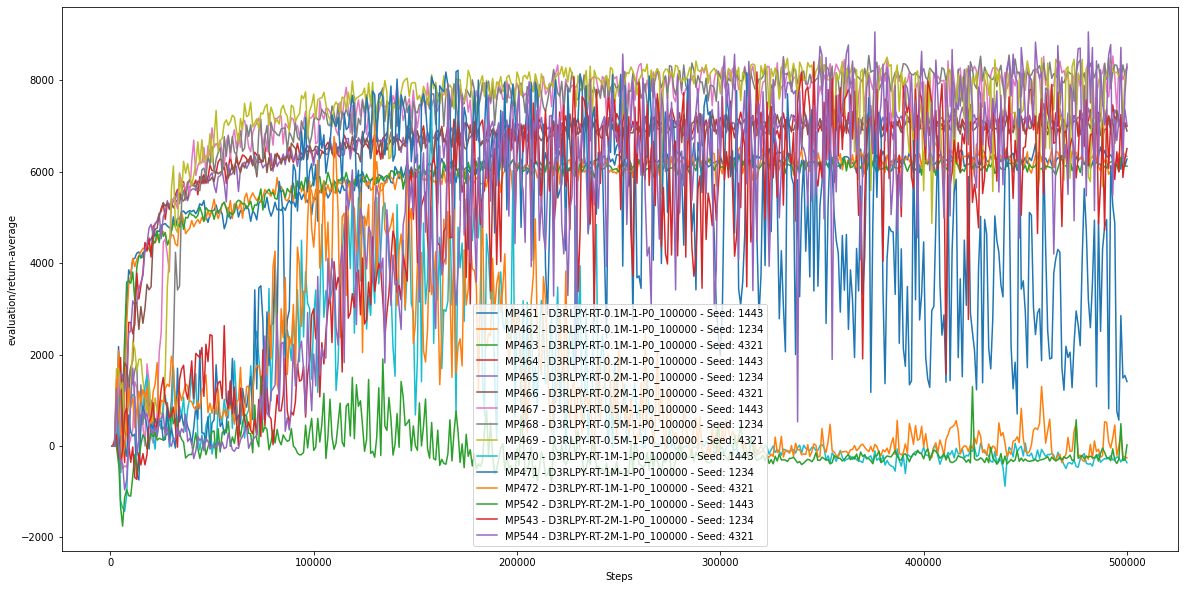

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP461,
    MP462,
    MP463,
    MP464,
    MP465,
    MP466,
    MP467,
    MP468,
    MP469,
    MP470,
    MP471,
    MP472,
    MP542,
    MP543,
    MP544,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

{'Steps: 0.1M': {'mean': 6244, 'std': 90},
 'Steps: 0.2M': {'mean': 6963, 'std': 53},
 'Steps: 0.5M': {'mean': 8280, 'std': 11},
 'Steps: 1M': {'mean': 258, 'std': 813},
 'Steps: 2M': {'mean': 4960, 'std': 3573}}

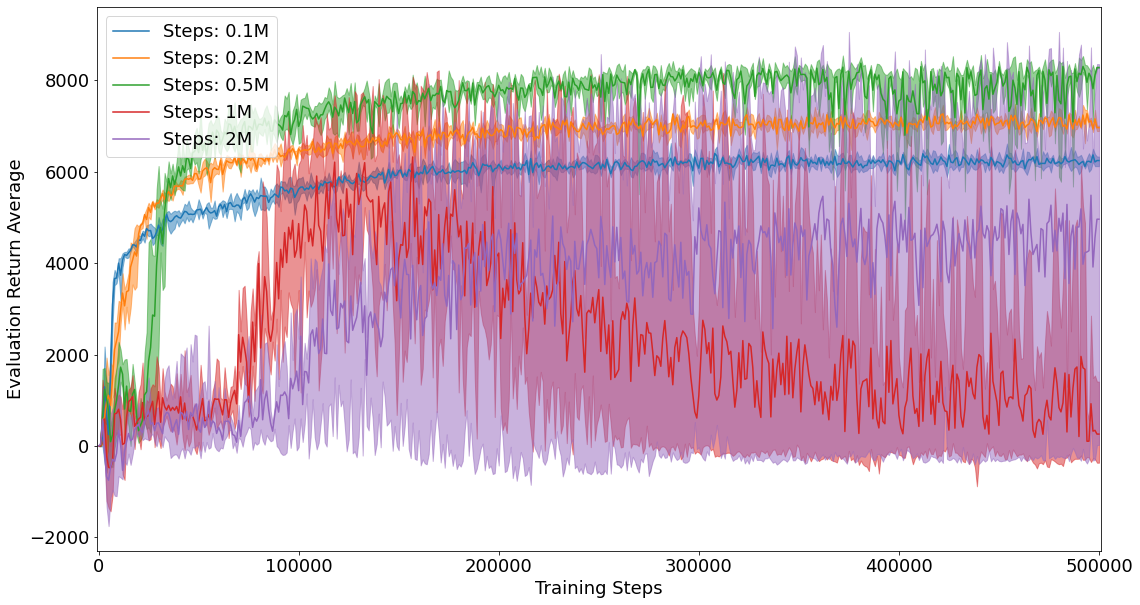

In [19]:
plot_grouped_evaluation_returns([
    ((MP461, MP462, MP463), 'Steps: 0.1M'),
    ((MP464, MP465, MP466), 'Steps: 0.2M'),
    ((MP467, MP468, MP469), 'Steps: 0.5M'),
    ((MP470, MP471, MP472), 'Steps: 1M'),
    ((MP542, MP543, MP544), 'Steps: 2M'),
], save_path='ch4/d3rlpy_0.1M_records.png')

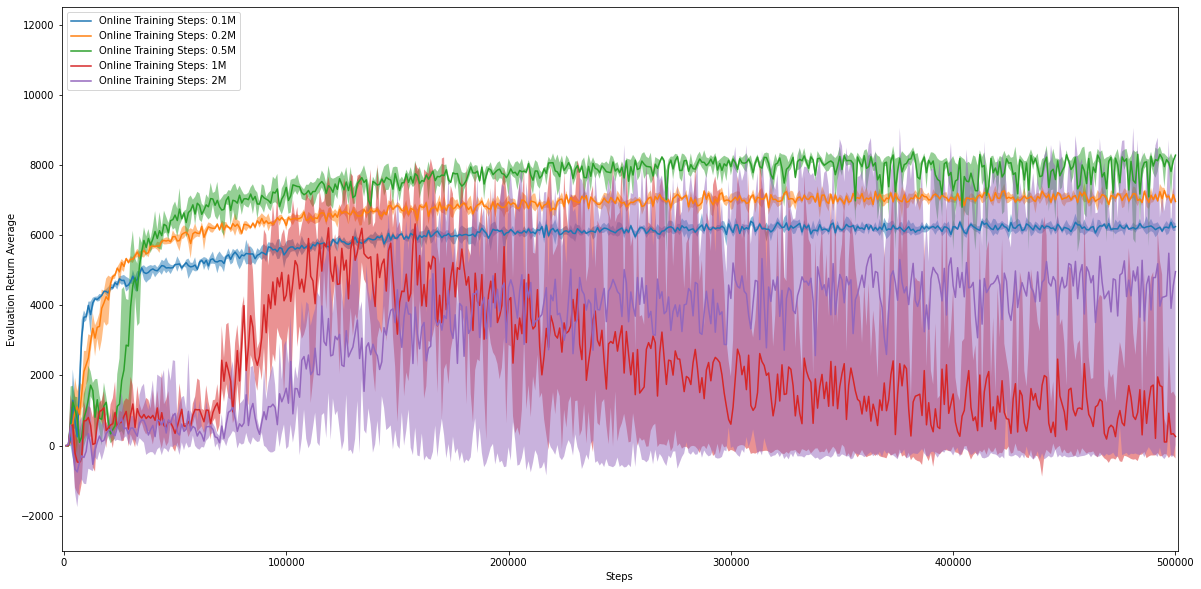

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

terminal_stats = {}
feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP461, MP462, MP463), '0.1'),
    ((MP464, MP465, MP466), '0.2'),
    ((MP467, MP468, MP469), '0.5'),
    ((MP470, MP471, MP472), '1'),
    ((MP542, MP543, MP544), '2'),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    std_vals = stacked_data.std(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'Online Training Steps: {steps}M')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
    terminal_stats[exp_set[0].dataset] = {'mean': mean_vals[-1], 'std': std_vals[-1], 'text ': f'{mean_vals[-1]:.0f}±{std_vals[-1]:.0f}'}
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
ax.set_xlim(-1000,501000)
ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass

In [13]:
terminal_stats

{'D3RLPY-RT-0.1M-1-P0_100000': {'mean': 6243.93701171875,
  'std': 89.69426537759668,
  'text ': '6244±90'},
 'D3RLPY-RT-0.2M-1-P0_100000': {'mean': 6962.905110677083,
  'std': 53.13866105501359,
  'text ': '6963±53'},
 'D3RLPY-RT-0.5M-1-P0_100000': {'mean': 8280.149088541666,
  'std': 10.861572228735712,
  'text ': '8280±11'},
 'D3RLPY-RT-1M-1-P0_100000': {'mean': 258.4812520345052,
  'std': 813.3941258151212,
  'text ': '258±813'},
 'D3RLPY-RT-2M-1-P0_100000': {'mean': 4960.286551157634,
  'std': 3573.208852046181,
  'text ': '4960±3573'}}

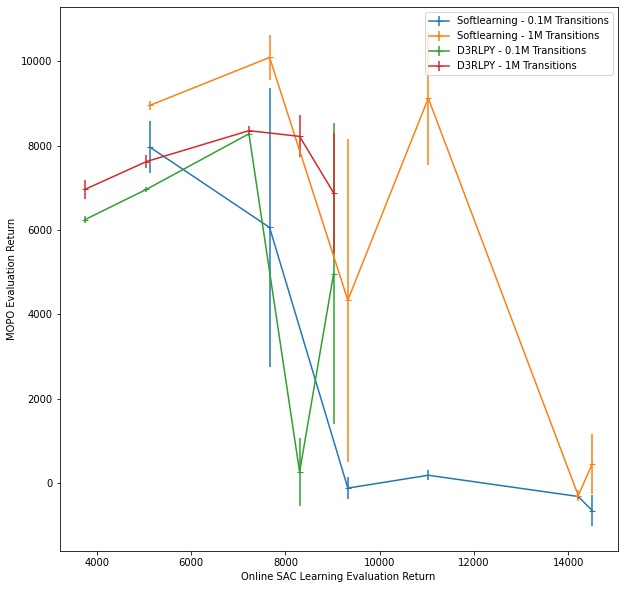

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.errorbar([5126, 7663, 9324, 11032, 14215, 14511], [7961, 6058, -124, 181, -323, -657], [612, 3319, 252, 119, 49, 368], marker='_', label='Softlearning - 0.1M Transitions')
ax.errorbar([5126, 7663, 9324, 11032, 14215, 14511], [8956, 10091, 4334, 9124, -302, 450], [101, 533, 3830, 1573, 123, 721], marker='_', label='Softlearning - 1M Transitions')
ax.errorbar([3744, 5050, 7225, 8300, 9022], [6244, 6963, 8280, 258, 4960], [90, 53, 11, 813, 3573], marker='_', label='D3RLPY - 0.1M Transitions')
ax.errorbar([3744, 5050, 7225, 8300, 9022], [6961, 7622, 8354, 8219, 6879], [220, 148, 116, 500, 1431], marker='_', label='D3RLPY - 1M Transitions')
ax.set_xlabel('Online SAC Learning Evaluation Return')
ax.set_ylabel('MOPO Evaluation Return')
ax.legend()

## MBPO

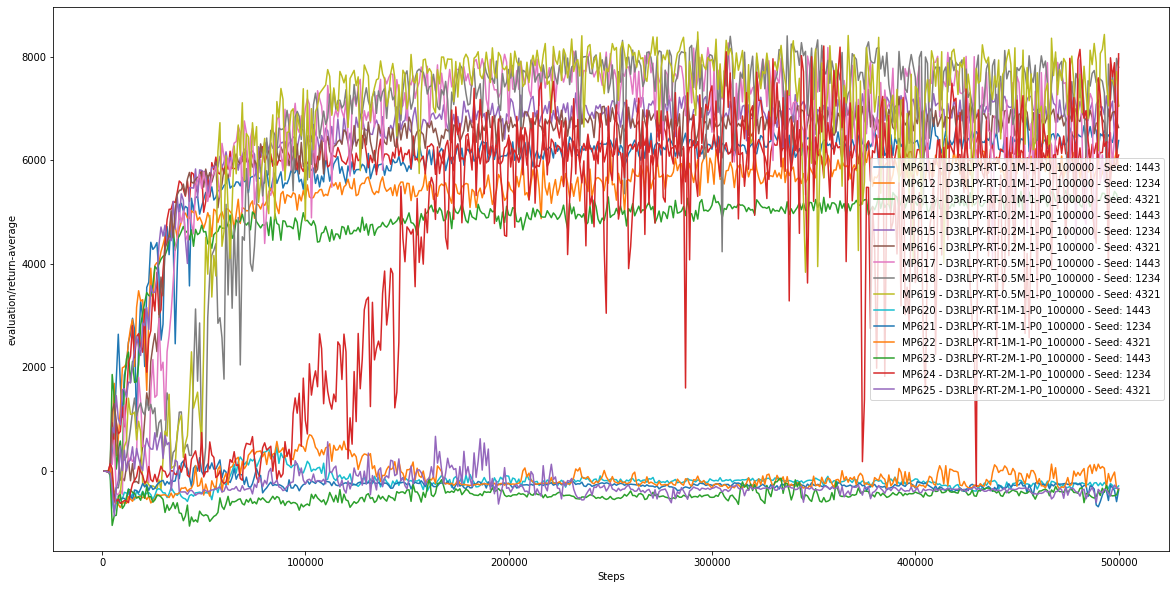

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp in [
    MP611,
    MP612,
    MP613,
    MP614,
    MP615,
    MP616,
    MP617,
    MP618,
    MP619,
    MP620,
    MP621,
    MP622,
    MP623,
    MP624,
    MP625,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

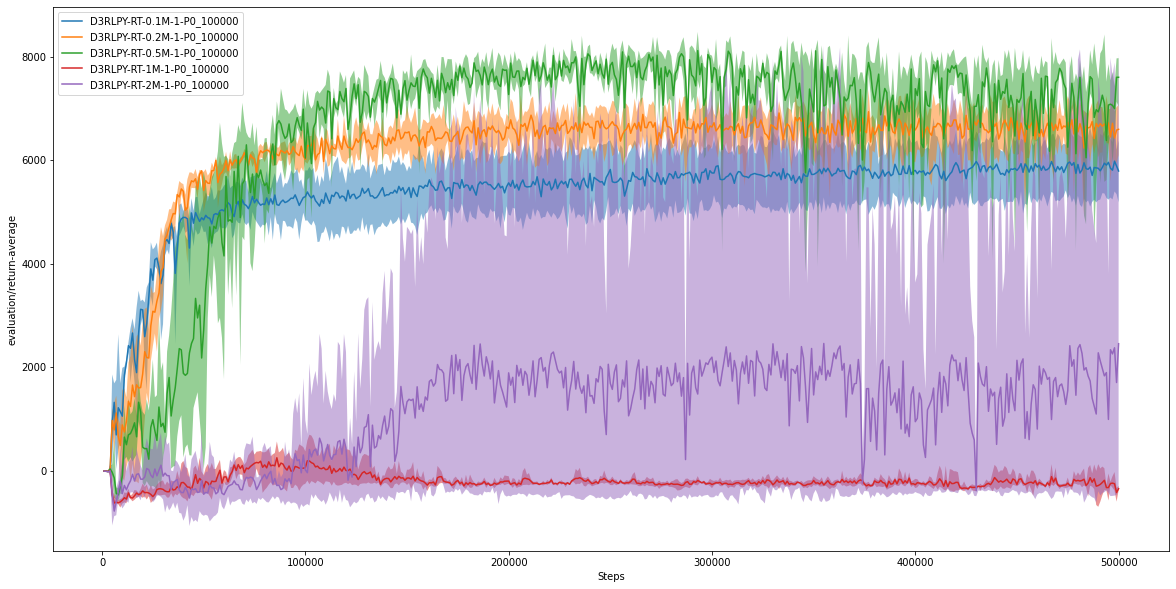

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set in [
    (MP611, MP612, MP613),
    (MP614, MP615, MP616),
    (MP617, MP618, MP619),
    (MP620, MP621, MP622),
    (MP623, MP624, MP625),
]:
    stacked_data = np.vstack([i.sac.result[feature] for i in exp_set])
    mean_vals = stacked_data.mean(axis=0)
    min_vals = stacked_data.min(axis=0)
    max_vals = stacked_data.max(axis=0)
    ax.plot(exp.sac.result['timesteps_total'], mean_vals, label=f'{exp_set[0].dataset}')
    ax.fill_between(exp.sac.result['timesteps_total'], min_vals, max_vals, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass